# Project 2

Approximation of Π using summing a circle's area

One Numerical approximation of π can be defined through the area of a circle. Points are randomly scattered inside the unit square, some fall within the unit circle. The fraction of points inside the circle approaches to the area as points are added.

## Tasks

Write a python code to compute π approximation using different number of points. 
- Generate random points in [0, 1]
- Count how many of them are inside the unit circle

Example output after running one time would be
![](https://raw.githubusercontent.com/mi-ng/i116-assignments/master/img/2_2.png)

Example output after running 5 times and computing average values
![](https://raw.githubusercontent.com/mi-ng/i116-assignments/master/img/2_1.png)

You can also visualize your trials for each n value using plotting libraries (see at https://upload.wikimedia.org/wikipedia/commons/8/84/Pi_30K.gif )

![](https://raw.githubusercontent.com/mi-ng/i116-assignments/master/img/2_3.png)


In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [0]:
class Point2D:
  def __init__(self, x, y):
    self.x = x
    self.y = y

In [0]:
def distance(p1, p2):
  a = p1.x - p2.x
  b = p1.y - p2.y
  return math.sqrt( (a*a) + (b*b) )

def is_in_unit_circle(p):
  p0 = Point2D(0, 0)
  return distance(p0, p) < 1

def count_points_in_circle(ps):
  count = 0
  for p in ps:
    if (is_in_unit_circle(p)):
      count += 1
  return count


def draw(ps, n, pi):
  x_label = "n=" + str(n) + ", π=" + str(pi)
  plt.xlabel(x_label)
  plt.axis([0, 1, 0, 1])
  plt.gca().set_aspect('equal', adjustable='box')

  # Draw points
  for p in ps:
    if (is_in_unit_circle(p)):
      plt.scatter(p.x, p.y, color='r', s=1)
    else:
      plt.scatter(p.x, p.y, color='b', s=1)

  # Draw circle
  ax = plt.gca()
  circle = plt.Circle((0, 0), 1, color='gray', fill=True, alpha=0.2)
  ax.add_artist(circle)

  plt.tight_layout()
  plt.show()


def approximate_pi_one_time(n, draw_figure):
  pxs = np.random.uniform(0, 1, n)
  pys = np.random.uniform(0, 1, n)
  ps = []

  for i in range(len(pxs)):
    ps.append(Point2D(pxs[i], pys[i]))

  count = count_points_in_circle(ps)
  pi = 4 * (count / len(ps))

  if (draw_figure):
    draw(ps, n, pi)
  
  return pi

def approximate_pi(n, times):
  pis = []

  for i in range(times):
    should_draw = i == (times - 1)
    pis.append(approximate_pi_one_time(n, should_draw))
  
  return (sum(pis) / len(pis))

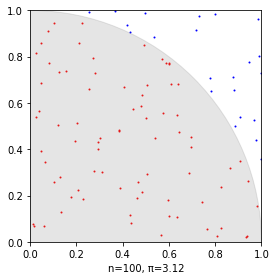

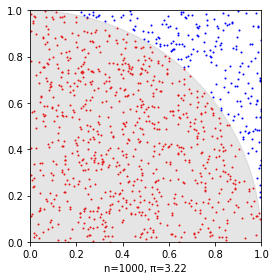

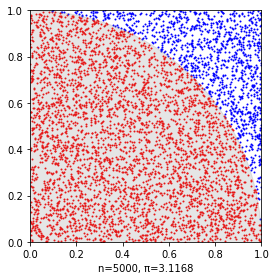

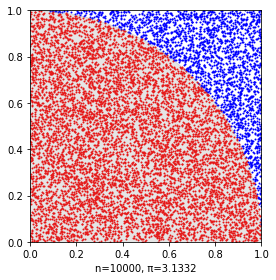

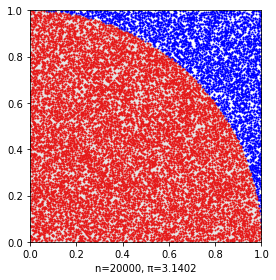

n=100, times=5, π=3.216
n=1000, times=5, π=3.1832000000000003
n=5000, times=5, π=3.1288
n=10000, times=5, π=3.14656
n=20000, times=5, π=3.14316


In [0]:
times = 5
ns = [100, 1000, 5000, 10000, 20000]
pis = []

# Compute average pi in n times
for n in ns:
  pi = approximate_pi(n, times)
  pis.append(pi)

# Print result
for i in range(len(ns)):
  n  = ns[i]
  pi = pis[i]
  print("n=" + str(n) + ", times=" + str(times) + ", π=" + str(pi))